Using LSTM to predict the Malicious Nodes

LSTM Implementation

In [53]:
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical

# Load data
data = pd.read_csv('sensornodes.csv')

data.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-23 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-23 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-23 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-23 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-23 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [59]:
X_columns = ['Packet_Rate',	'Packet_Drop_Rate', 'Packet_Duplication_Rate', 'Data_Throughput', 'Signal_Strength', 'SNR',	'Battery_Level', 'Number_of_Neighbors',	'Route_Request_Frequency',	'Route_Reply_Frequency', 'Data_Transmission_Frequency', 'Data_Reception_Frequency',	'Error_Rate', 'CPU_Usage',	'Memory_Usage',	'Bandwidth']  
y_column = 'Is_Malicious'

# Prepare the data
X = data[X_columns].values
y = data[y_column].values
y = to_categorical(y)  # One-hot encoding

In [60]:
# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for LSTM [samples, time steps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



In [61]:
X_train = X_train[:100,]
y_train = y_train[:100,]

In [39]:
# LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_scaled.shape[1], X_scaled.shape[2])))  # Adjust the number of neurons
model.add(Dense(y.shape[1], activation='softmax'))  # The output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test), verbose=2)

In [112]:
# Train the model without adding stacked LSTM
from sklearn.utils import class_weight
import numpy as np

# Convert y_train back to 1D if it's one-hot encoded
y_train_labels = np.argmax(y_train, axis=1)
y_train_labels = y_train_labels[:100,]
# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)

# Convert class weights to a dictionary to pass to Keras
class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), 
          class_weight=class_weights_dict, verbose=2)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/10
4/4 - 5s - loss: 0.7130 - accuracy: 0.0000e+00 - val_loss: 0.7204 - val_accuracy: 0.0437 - 5s/epoch - 1s/step
Epoch 2/10
4/4 - 0s - loss: 0.7069 - accuracy: 0.0100 - val_loss: 0.7152 - val_accuracy: 0.0437 - 268ms/epoch - 67ms/step
Epoch 3/10
4/4 - 0s - loss: 0.7040 - accuracy: 0.0100 - val_loss: 0.7097 - val_accuracy: 0.0410 - 263ms/epoch - 66ms/step
Epoch 4/10
4/4 - 0s - loss: 0.7005 - accuracy: 0.0100 - val_loss: 0.7046 - val_accuracy: 0.0413 - 273ms/epoch - 68ms/step
Epoch 5/10
4/4 - 0s - loss: 0.6980 - accuracy: 0.0100 - val_loss: 0.7006 - val_accuracy: 0.0507 - 267ms/epoch - 67ms/step
Epoch 6/10
4/4 - 0s - loss: 0.6949 - accuracy: 0.0800 - val_loss: 0.6945 - val_accuracy: 0.3403 - 265ms/epoch - 66ms/step
Epoch 7/10
4/4 - 0s - loss: 0.6920 - accuracy: 0.5000 - val_loss: 0.6900 - val_accuracy: 0.8330 - 240ms/epoch - 60ms/step
Epoch 8/10
4/4 - 0s - loss: 0.6890 - accuracy: 0.9200 - val_loss: 0.6853 - val_accuracy: 0.9770 - 256ms/epoch - 64ms/step
Epoch 9/10
4/4 - 0s - los

In [69]:
# Stacked LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_scaled.shape[1], X_scaled.shape[2]), return_sequences=True))  # Adjust the number of neurons
model.add(LSTM(50, return_sequences=False))

model.add(Dense(y.shape[1], activation='softmax'))  # The output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test), verbose=2)


In [80]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 1, 50)             13400     
                                                                 
 lstm_25 (LSTM)              (None, 50)                20200     
                                                                 
 dense_13 (Dense)            (None, 2)                 102       
                                                                 
Total params: 33702 (131.65 KB)
Trainable params: 33702 (131.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
# Train the model
from sklearn.utils import class_weight
import numpy as np

# Convert y_train back to 1D if it's one-hot encoded
y_train_labels = np.argmax(y_train, axis=1)
y_train_labels = y_train_labels[:100,]


# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)

# Convert class weights to a dictionary to pass to Keras
class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
hist1 = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), 
          class_weight=class_weights_dict, verbose=2)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/20
4/4 - 0s - loss: 0.1059 - accuracy: 1.0000 - val_loss: 0.1159 - val_accuracy: 0.9983 - 375ms/epoch - 94ms/step
Epoch 2/20
4/4 - 0s - loss: 0.0893 - accuracy: 1.0000 - val_loss: 0.0941 - val_accuracy: 0.9983 - 296ms/epoch - 74ms/step
Epoch 3/20
4/4 - 0s - loss: 0.0774 - accuracy: 1.0000 - val_loss: 0.0811 - val_accuracy: 0.9983 - 297ms/epoch - 74ms/step
Epoch 4/20
4/4 - 0s - loss: 0.0616 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9983 - 300ms/epoch - 75ms/step
Epoch 5/20
4/4 - 0s - loss: 0.0513 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9983 - 311ms/epoch - 78ms/step
Epoch 6/20
4/4 - 0s - loss: 0.0442 - accuracy: 1.0000 - val_loss: 0.0546 - val_accuracy: 0.9983 - 300ms/epoch - 75ms/step
Epoch 7/20
4/4 - 0s - loss: 0.0383 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9983 - 310ms/epoch - 78ms/step
Epoch 8/20
4/4 - 0s - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9983 - 300ms/epoch - 75ms/step
Epoch 9/20
4/4 - 0s - lo

Text(0, 0.5, 'Loss')

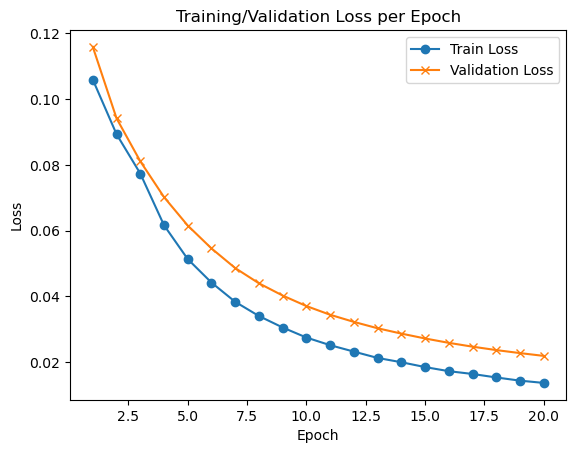

In [75]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist1.history['loss'], 'o-')
ax.plot([None] + hist1.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [81]:
def generate_actual_predicted(model, X_test, Y_test):
    # Get the predictions
    Y_pred = model.predict(X_test)

    # Create a list of predictions

    #Converting predictions to label
    predicted = list()
    for i in range(len(Y_pred)):
        predicted.append(np.argmax(Y_pred[i]))

    #Converting one hot encoded test label back to label
    actual = list()
    for i in range(len(Y_test)):
        actual.append(np.argmax(Y_test[i]))

    return actual, predicted

actual, predicted = generate_actual_predicted(model, X_test, y_test)

94/94 [==============================] - 14s 15ms/step


In [82]:
# Now we can determine the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actual,predicted)
print(cm)

from sklearn.metrics import accuracy_score
print(accuracy_score(actual, predicted))
# We will plot the "averages across classes" for each 
# of the metrics. Macro gives us the average of particular
# values across classes. This is a very crude measure.

from sklearn.metrics import f1_score
print(f1_score(actual, predicted, average='macro'))

from sklearn.metrics import precision_score
print(precision_score(actual, predicted, average='macro'))

from sklearn.metrics import recall_score
print(recall_score(actual, predicted, average='macro'))

[[2864    0]
 [   5  131]]
0.9983333333333333
0.9902006322552068
0.9991286162425932
0.9816176470588236


,AUC
0,0.999995
1,0.999995


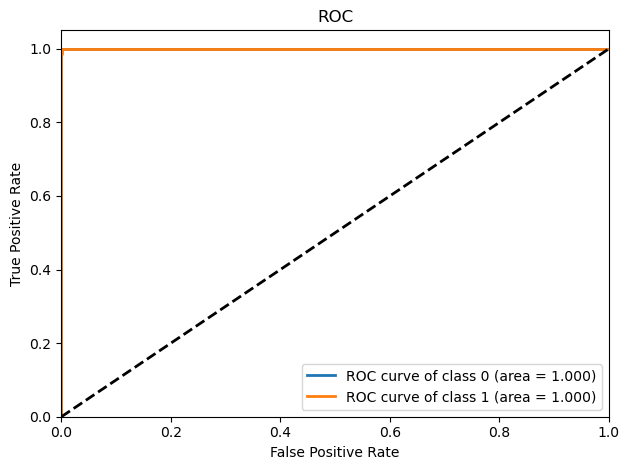

In [84]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]  # one hot encoded

y_score=model.predict(X_test, batch_size=None, verbose=0, steps=None)

# compare each class's probabilities one by one
# each acts like a single column
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print the AUC scores
from IPython.display import display
import pandas as pd
auc_array = np.array(list(roc_auc.items()))
df = pd.DataFrame(auc_array[:,1])
df.columns = ['AUC']
display(df)

# Draw the pairwise ROC curves
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,label='ROC curve of class {0} (area = {1:0.3f})'
    ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC.png')
plt.show()